<a href="https://colab.research.google.com/github/cormach/pymc3-bayesian-analysis-book/blob/main/Chapter_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import statsmodels as sm
import scipy.stats as stats
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt
%matplotlib inline

Chapter 2

In [5]:
np.random.seed(123)
trials = 4
theta_real = 0.35
data = stats.bernoulli.rvs(p=theta_real, size=trials)

In [15]:
with pm.Model() as our_first_model:
  θ = pm.Beta('θ', alpha=1., beta=1.)
  y  = pm.Bernoulli('y',p= θ, observed=data)
  trace=pm.sample(1000, random_seed=123)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  after removing the cwd from sys.path.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [θ]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 8 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde10383f90>,
      dtype=object)

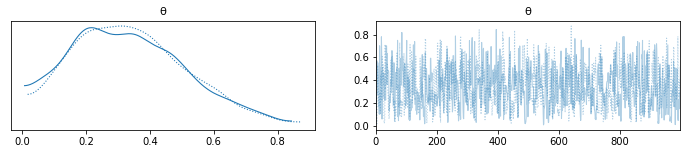

In [16]:
az.plot_trace(trace)

In [17]:
az.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
θ,0.336,0.172,0.026,0.637,0.006,0.004,731.0,975.0,1.0


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


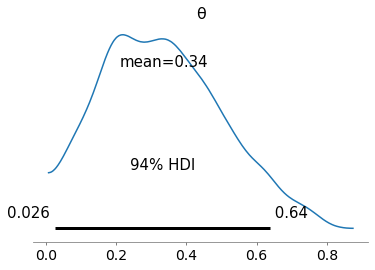

In [18]:
az.plot_posterior(trace)

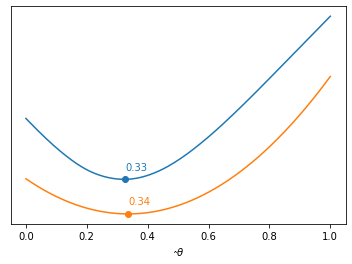

In [25]:
grid = np.linspace(0,1,200)
θ_pos = trace['θ']
lossf_a = [np.mean(abs(i-θ_pos)) for i in grid]
lossf_b = [np.mean(abs(i-θ_pos)**2) for i in grid]

for lossf, c in zip ([lossf_a, lossf_b],['C0','C1']):
  mini = np.argmin(lossf)
  plt.plot(grid, lossf, c)
  plt.plot(grid[mini],lossf[mini],'o',color=c)
  plt.annotate('{:.2f}'.format(grid[mini]),
               (grid[mini], lossf[mini]+ 0.03), color=c)
  plt.yticks([])
  plt.xlabel(r'$\hat \theta$')

In [26]:
print(f"mean: {np.mean(θ_pos)}; median: {np.median(θ_pos)}")

mean: 0.3359887424524105; median: 0.32390894266092074


The mean is a linear loss function - the median is a quadratic loss function?  You are imposing ad hoc loss functions when you use them is the claim by Bayesians